In [214]:
# LA case study:  Hot-spots in FEMA Vulnerability Index
## I am specifically interested in understanding FEMA Vulnerability Index, specifically Heat Wave Vulnerability. In this notebook, I created a chloropleth map and chart. I am currently trouble shooting how to create a centroid given the shapefile and for loops.

In [215]:
import pandas as pd
import geopandas as gpd

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

import contextily as ctx

In [216]:
import os
print(os.getcwd())

/home/jovyan/up221-sienna/25W-groupproject


In [217]:
print(os.listdir())

['data', '.ipynb_checkpoints', 'Age_Profile_Los_Angeles.ipynb', 'FEMA_Vulnerability_Index.ipynb']


In [218]:
import geopandas as gpd
import pyogrio

# Read only re Los Angeles County data
la_county = pyogrio.read_dataframe("data/NRI_Shapefile_CensusTracts.shp", 
                                   where="COUNTY = 'Los Angeles' AND STATE = 'California'",
                                   columns=["COUNTY", "STATE", "TRACT", "TRACTFIPS", "HWAV_RISKV", "HWAV_RISKS", "HWAV_RISKR"])

# Convert to GeoDataFrame
la_county_gdf = gpd.GeoDataFrame(la_county,crs='epsg:2229', geometry="geometry")

In [219]:
#preview data and columns
la_county_gdf.head(5)

,COUNTY,HWAV_RISKR,HWAV_RISKS,HWAV_RISKV,STATE,TRACT,TRACTFIPS,geometry
0,Los Angeles,Relatively Low,43.973267,6451.720938,California,101110,06037101110,"POLYGON ((-13168866.824 4064202.623, -13168760..."
1,Los Angeles,Relatively Low,34.239880,3394.886179,California,101122,06037101122,"POLYGON ((-13166585.108 4063755.581, -13166589..."
2,Los Angeles,Relatively Low,38.557770,4577.152952,California,101220,06037101220,"POLYGON ((-13167426.461 4063214.952, -13167371..."
3,Los Angeles,Relatively Low,40.336774,5157.533315,California,101221,06037101221,"POLYGON ((-13167688.396 4063216.972, -13167688..."
4,Los Angeles,Relatively Low,37.661133,4322.069956,California,101222,06037101222,"POLYGON ((-13167531.546 4063215.76, -13167531...."


In [220]:
#print columns and info
print(la_county_gdf.head())
print(la_county_gdf.info())

        COUNTY      HWAV_RISKR  HWAV_RISKS   HWAV_RISKV       STATE   TRACT  \
0  Los Angeles  Relatively Low   43.973267  6451.720938  California  101110   
1  Los Angeles  Relatively Low   34.239880  3394.886179  California  101122   
2  Los Angeles  Relatively Low   38.557770  4577.152952  California  101220   
3  Los Angeles  Relatively Low   40.336774  5157.533315  California  101221   
4  Los Angeles  Relatively Low   37.661133  4322.069956  California  101222   

     TRACTFIPS                                           geometry  
0  06037101110  POLYGON ((-13168866.824 4064202.623, -13168760...  
1  06037101122  POLYGON ((-13166585.108 4063755.581, -13166589...  
2  06037101220  POLYGON ((-13167426.461 4063214.952, -13167371...  
3  06037101221  POLYGON ((-13167688.396 4063216.972, -13167688...  
4  06037101222  POLYGON ((-13167531.546 4063215.76, -13167531....  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 8 columns):
 # 

In [221]:
# output the data's projection
la_county_gdf.crs

<Projected CRS: EPSG:2229>
Name: NAD83 / California zone 5 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Kern; Los Angeles; San Bernardino; San Luis Obispo; Santa Barbara; Ventura.
- bounds: (-121.42, 32.76, -114.12, 35.81)
Coordinate Operation:
- name: SPCS83 California zone 5 (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [222]:
# to give more power to your figures (plots)
import matplotlib.pyplot as plt
!pip install plotly
import contextily as ctx
import plotly.express as px

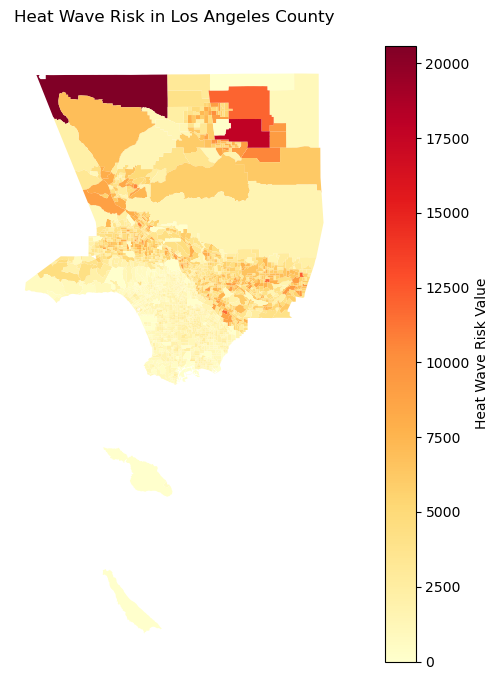

In [223]:
# Create Heat Wave Risk to Los Angeles County
fig, ax = plt.subplots(figsize=(12, 8))
la_county_gdf.plot(column='HWAV_RISKV', cmap='YlOrRd', legend=True, 
                   legend_kwds={'label': 'Heat Wave Risk Value'}, ax=ax, aspect=1)
ax.set_title('Heat Wave Risk in Los Angeles County')
plt.axis('off')
plt.show()

In [200]:
#Basic statistics to try to find percentiles ranges
print(la_county_gdf['HWAV_RISKV'].describe())

count     2495.000000
mean      2957.976939
std       2264.926447
min          0.000000
25%       1217.247601
50%       2091.516341
75%       4392.922512
max      20601.516570
Name: HWAV_RISKV, dtype: float64


In [201]:
# Define high-risk threshold
high_risk_areas = la_county_gdf.sort_values('HWAV_RISKS', ascending=False)
print(high_risk_areas)

           COUNTY           HWAV_RISKR  HWAV_RISKS    HWAV_RISKV       STATE  \
2345  Los Angeles  Relatively Moderate   66.121629  20601.516570  California   
2399  Los Angeles  Relatively Moderate   63.057128  17796.676091  California   
1207  Los Angeles  Relatively Moderate   55.345336  12248.324039  California   
2352  Los Angeles  Relatively Moderate   54.860153  11929.875113  California   
1604  Los Angeles  Relatively Moderate   54.686534  11820.073489  California   
...           ...                  ...         ...           ...         ...   
1043  Los Angeles             Very Low   15.674499      1.215177  California   
2470  Los Angeles             Very Low   15.638824      0.668636  California   
2492  Los Angeles             Very Low   15.509204      0.076883  California   
2478  Los Angeles             Very Low   15.412881      0.005956  California   
2461  Los Angeles            No Rating    0.000000      0.000000  California   

       TRACT    TRACTFIPS              

In [202]:
# Show distinct values of heat wave risk
print(high_risk_areas['HWAV_RISKR'].unique().tolist())

['Relatively Moderate', 'Relatively Low', 'Very Low', 'No Rating']


In [203]:
# Define the custom order
custom_order = ["No Rating", "Very Low", "Relatively Low", "Relatively Moderate"]

In [204]:
# Convert HWAV_RISKR to categorical type with the custom order
risk_counts['HWAV_RISKR'] = pd.Categorical(risk_counts['HWAV_RISKR'], categories=custom_order, ordered=True)

In [205]:
# Sort the dataframe based on the new categorical column
risk_counts = risk_counts.sort_values('HWAV_RISKR')
risk_counts

,HWAV_RISKR,Count
3,No Rating,1
1,Very Low,76
0,Relatively Low,2380
2,Relatively Moderate,38


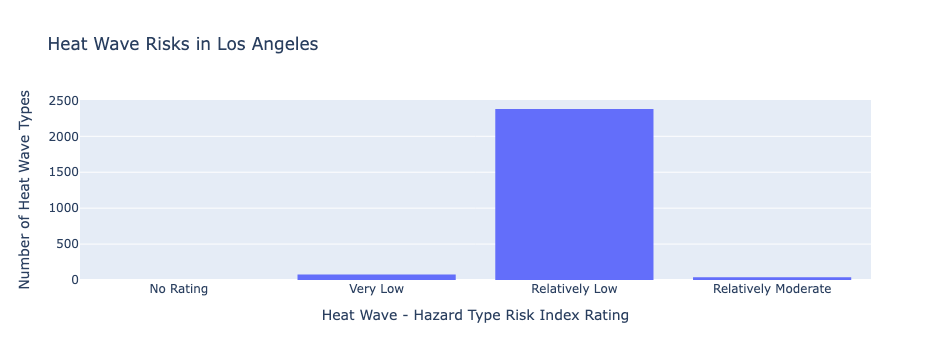

In [206]:
# a simple bar chart, putting heat wave type on the x-axis
fig = px.bar(risk_counts,
       x='HWAV_RISKR',
       y='Count',
       title='Heat Wave Risks in Los Angeles',
          labels={
            'HWAV_RISKR':'Heat Wave - Hazard Type Risk Index Rating',
            'Count':'Number of Heat Wave Types'})

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

In [240]:
# Sort Data for bar chart of the top 10 census tracts with the highest vulnerability to extreme heat
sorted_df = la_county_gdf.sort_values('HWAV_RISKV', ascending=False)
sorted_df

,COUNTY,HWAV_RISKR,HWAV_RISKS,HWAV_RISKV,STATE,TRACT,TRACTFIPS,geometry
2345,Los Angeles,Relatively Moderate,66.121629,20601.516570,California,901209,06037901209,"POLYGON ((-13233850.945 4139156.214, -13233817..."
2399,Los Angeles,Relatively Moderate,63.057128,17796.676091,California,911100,06037911100,"POLYGON ((-13122422.32 4111916.398, -13122370...."
1207,Los Angeles,Relatively Moderate,55.345336,12248.324039,California,401707,06037401707,"POLYGON ((-13106404.321 4043695.904, -13106404..."
2352,Los Angeles,Relatively Moderate,54.860153,11929.875113,California,901300,06037901300,"POLYGON ((-13151279.128 4131679.719, -13150281..."
1604,Los Angeles,Relatively Moderate,54.686534,11820.073489,California,502303,06037502303,"POLYGON ((-13142843.987 4024810.002, -13142875..."
...,...,...,...,...,...,...,...,...
1043,Los Angeles,Very Low,15.674499,1.215177,California,277400,06037277400,"POLYGON ((-13176897.187 4022450.1, -13176897.1..."
2470,Los Angeles,Very Low,15.638824,0.668636,California,980012,06037980012,"POLYGON ((-13152867.196 4019282.462, -13152952..."
2492,Los Angeles,Very Low,15.509204,0.076883,California,980037,06037980037,"POLYGON ((-13166372.925 4003033.101, -13166372..."
2478,Los Angeles,Very Low,15.412881,0.005956,California,980020,06037980020,"POLYGON ((-13168071.112 4060377.812, -13168028..."


In [248]:
# Select the top 10 census tracts
top_10_tracts= sorted_df.head(10)
top_10_tracts

,COUNTY,HWAV_RISKR,HWAV_RISKS,HWAV_RISKV,STATE,TRACT,TRACTFIPS,geometry
2345,Los Angeles,Relatively Moderate,66.121629,20601.516570,California,901209,06037901209,"POLYGON ((-13233850.945 4139156.214, -13233817..."
2399,Los Angeles,Relatively Moderate,63.057128,17796.676091,California,911100,06037911100,"POLYGON ((-13122422.32 4111916.398, -13122370...."
1207,Los Angeles,Relatively Moderate,55.345336,12248.324039,California,401707,06037401707,"POLYGON ((-13106404.321 4043695.904, -13106404..."
2352,Los Angeles,Relatively Moderate,54.860153,11929.875113,California,901300,06037901300,"POLYGON ((-13151279.128 4131679.719, -13150281..."
1604,Los Angeles,Relatively Moderate,54.686534,11820.073489,California,502303,06037502303,"POLYGON ((-13142843.987 4024810.002, -13142875..."
1309,Los Angeles,Relatively Moderate,54.325025,11619.582984,California,406103,06037406103,"POLYGON ((-13122491.996 4040372.483, -13122492..."
2411,Los Angeles,Relatively Moderate,52.575750,10588.802380,California,920035,06037920035,"POLYGON ((-13187786.138 4086381.174, -13187777..."
2353,Los Angeles,Relatively Moderate,52.531751,10559.880926,California,910002,06037910002,"POLYGON ((-13122413.191 4103969.657, -13122262..."
2372,Los Angeles,Relatively Moderate,52.493697,10539.060030,California,910601,06037910601,"POLYGON ((-13142197.12 4106985.158, -13142221...."
1176,Los Angeles,Relatively Moderate,52.210674,10383.307189,California,320300,06037320300,"POLYGON ((-13184203.984 4066367.771, -13184227..."


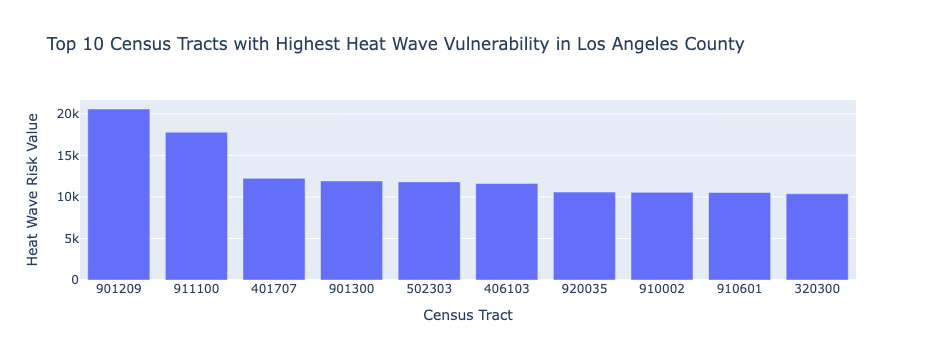

In [249]:
#Create Bar Chart
fig = px.bar(sorted_df.head(10),
       x='TRACT',
       y='HWAV_RISKV',
       title='Top 10 Census Tracts with Highest Heat Wave Vulnerability in Los Angeles County' ,
             labels={
            'TRACT':'Census Tract',
            'HWAV_RISKV':'Heat Wave Risk Value'})

fig.show()

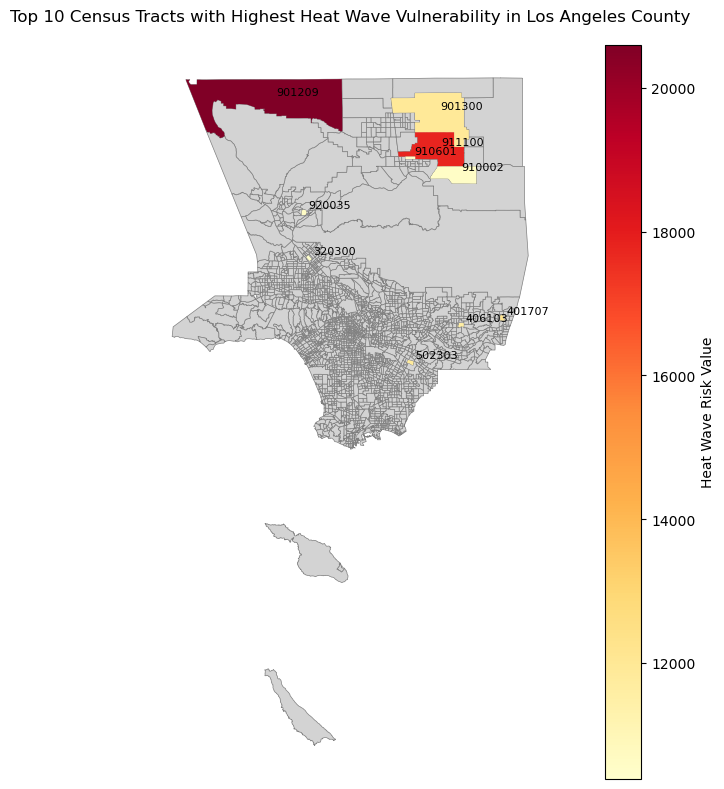

In [250]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot all tracts with a light gray color
la_county_gdf.plot(color='lightgray', edgecolor='gray', linewidth=0.5, ax=ax)

# Plot top 10 tracts with a color map
top_10_tracts.plot(column='HWAV_RISKV', cmap='YlOrRd', legend=True, 
                   legend_kwds={'label': 'Heat Wave Risk Value'}, 
                   ax=ax, aspect=1)

# Customize the plot
ax.set_title('Top 10 Census Tracts with Highest Heat Wave Vulnerability in Los Angeles County')
ax.axis('off')

# Add labels for top 10 tracts
for idx, row in top_10_tracts.iterrows():
    ax.annotate(text=row['TRACT'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                xytext=(3, 3), textcoords="offset points", fontsize=8, color='black')

plt.tight_layout()
plt.show()

In [207]:
# Received Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation, then need to roject the GeoDataFrame to a suitable projected CRS for Los Angeles.
print(la_county_gdf.crs)

epsg:2229


In [208]:
# Create interactive plotly map
import json
la_county_geojson = la_county_gdf[['geometry', 'HWAV_RISKR']].to_json()

In [209]:
la_county_gdf['geometry'] = la_county_gdf['geometry'].simplify(tolerance=0.001)

In [210]:
columns_to_keep = ['geometry', 'HWAV_RISKR', 'COUNTY', 'STATE', 'TRACT', 'HWAV_RISKV', 'HWAV_RISKS']
la_county_gdf = la_county_gdf[columns_to_keep]

In [212]:
la_county_gdf['centroid_lat'] = la_county_gdf.geometry.centroid.y
la_county_gdf['centroid_lon'] = la_county_gdf.geometry.centroid.x
center={"lat": la_county_gdf['centroid_lat'].mean(), "lon": la_county_gdf['centroid_lon'].mean()}

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(la_county_gdf, 
                           geojson=json.loads(la_county_geojson), 
                           locations=la_county_gdf.index, 
                           color="HWAV_RISKR",
                           color_continuous_scale="Viridis",
                           mapbox_style="carto-positron",
                           zoom=9,
                           center=center,
                           opacity=0.7,
                           labels={'HWAV_RISKR':'Heat Wave Risk Rating'},
                           hover_data=["TRACT", "HWAV_RISKV", "HWAV_RISKS"])

fig.update_layout(
    width=800,
    height=800,
    title="Interactive Heat Wave Risk Map for Los Angeles County",
    title_x=0.5,
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()